<a href="https://colab.research.google.com/github/Anzaliyadav321/LGMVIP-DataScience-Task-Number/blob/main/Task-1%20Develop%20A%20Neural%20Network%20That%20Can%20Read%20Handwritings%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Anjali Yadav**

**Develop A Neural Network That Can Read Handwriting Using Tensorflow and CNN 
 (Advanced - Level)**

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
#reading the data
 (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

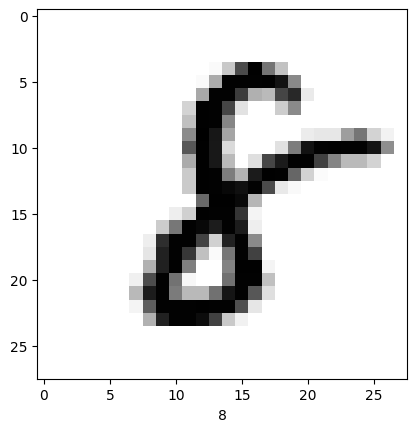

In [5]:
index = 499
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.xlabel(y_train[index])
plt.show()

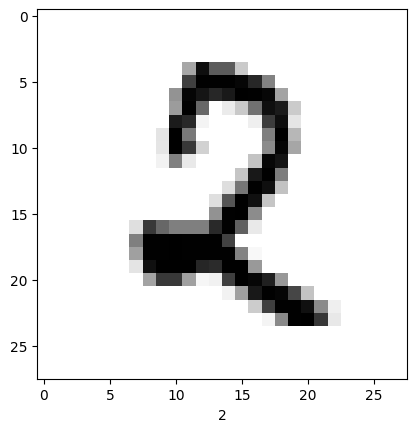

In [6]:
index = 4999
plt.imshow(X_train[index], cmap=plt.cm.binary)
plt.xlabel(y_train[index])
plt.show()

In [7]:
print(X_train[index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  88 241 163 163  53   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 191 253 253 253 249 216 125
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 250 234 216 229 254 253 248
   92   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  99 253 152   0  20  54 142 240
  228  52   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 228 214  11   0   0   

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Building and Compiling the CNN model**

In [9]:
data_input = tf.keras.Input(shape=(28,28,1), name='MNIST')

layer1 = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), activation='relu')(data_input)
layer1_Dropout = tf.keras.layers.Dropout(0.2)(layer1)
layer1_maxpool = tf.keras.layers.MaxPool2D()(layer1_Dropout)



layer2 = tf.keras.layers.Conv2D(filters=6, kernel_size=(3,3), activation='relu')(layer1_maxpool)
layer2_Dropout = tf.keras.layers.Dropout(0.2)(layer2)
layer2_maxpool = tf.keras.layers.MaxPool2D()(layer2_Dropout)



layer3 = tf.keras.layers.Conv2D(filters=12, kernel_size=(3,3), activation='relu')(layer2_maxpool)
layer3_Dropout = tf.keras.layers.Dropout(0.2)(layer3)
layer3_maxpool = tf.keras.layers.MaxPool2D()(layer3_Dropout)


flattened_layer = tf.keras.layers.Flatten()(layer3_maxpool)


dense1 = tf.keras.layers.Dense(units=64, activation='relu')(flattened_layer)
dense1_dropout = tf.keras.layers.Dropout(0.2)(dense1)

dense2 = tf.keras.layers.Dense(units=10, activation='softmax')(dense1_dropout)



mnist_model = tf.keras.models.Model(inputs=data_input, outputs=dense2)



mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


In [10]:
mnist_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MNIST (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 dropout (Dropout)           (None, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 6)         168       
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 6)         0         
                                                             

**Visulizing of the model**

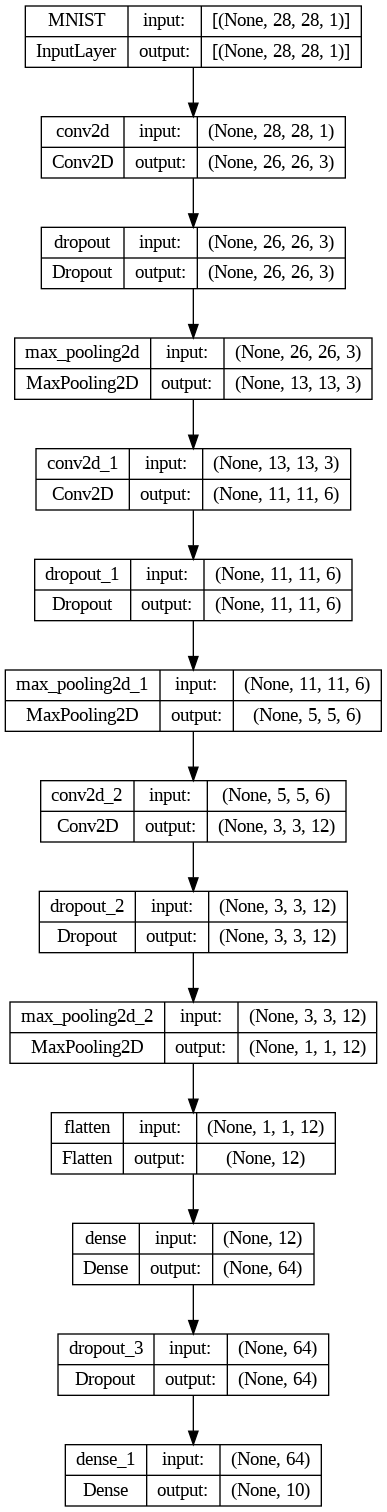

In [11]:
tf.keras.utils.plot_model(
    mnist_model,
    show_shapes=True,
    show_layer_names=True,
)

**Training the model**

In [12]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)

In [ ]:
training_history = mnist_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 50s 28ms/step - loss: 2.3112 - acc: 0.4013 - val_loss: 0.9323 - val_acc: 0.7820
Epoch 2/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.8501 - acc: 0.7341 - val_loss: 0.5968 - val_acc: 0.8462
Epoch 3/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.5809 - acc: 0.8215 - val_loss: 0.4254 - val_acc: 0.9040
Epoch 4/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.4791 - acc: 0.8515 - val_loss: 0.3718 - val_acc: 0.9073
Epoch 5/10
1688/1688 [==============================] - 31s 18ms/step - loss: 0.4272 - acc: 0.8693 - val_loss: 0.3048 - val_acc: 0.9248
Epoch 6/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.4086 - acc: 0.8737 - val_loss: 0.3011 - val_acc: 0.9223
Epoch 7/10
1688/1688 [==============================] - 30s 17ms/step - loss: 0.3913 - acc: 0.8800 - val_loss: 0.3641 - val_acc: 0.9115
Epoch 8/10
1688/1688 [==========================

**Model evaluation**

In [ ]:
#Loss plot curve for training and validation
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

In [ ]:
#Accuracy plot curve for training and validation
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['acc'], label='training set')
plt.plot(training_history.history['val_acc'], label='validation set')
plt.legend()

In [16]:
#performance of training dataset
train_loss, train_acc = mnist_model.evaluate(X_train, y_train)

print('Train loss: ', train_loss)
print('Train accuracy; ', train_acc)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.3025 - acc: 0.9210
Train loss:  0.30249327421188354
Train accuracy;  0.9210333228111267


In [17]:
y_pred = mnist_model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [18]:
y_test[1]

2

In [19]:
y_pred[1]

array([0.033092  , 0.01715716, 0.86087745, 0.02442025, 0.01670542,
       0.00333277, 0.01530813, 0.00544119, 0.02264445, 0.00102105],
      dtype=float32)

In [20]:
y_pred_class = y_pred.argmax(axis=1)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.98      0.89      0.94      1010
           4       0.99      0.87      0.93       982
           5       0.90      0.95      0.92       892
           6       0.95      0.98      0.96       958
           7       0.97      0.88      0.92      1028
           8       0.77      0.98      0.86       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



In [22]:
class_names =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
def plot_number(i, y_pred, y_test_class, num):
    y_pred, y_test_class, num = y_pred[i], y_test_class[i], num[i]
    
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(num, cmap=plt.cm.binary)
    predicted_label = np.argmax(y_pred)
    
    if predicted_label == y_test_class:
        color = 'blue'
        
    else:
        color = 'red'
        
    predicted = class_names[predicted_label]  
    probability = round(100* np.max(y_pred), 2)
    actual_class = class_names[y_test_class]
    plt.xlabel(f'{predicted}, {probability}% ({actual_class})', color=color)

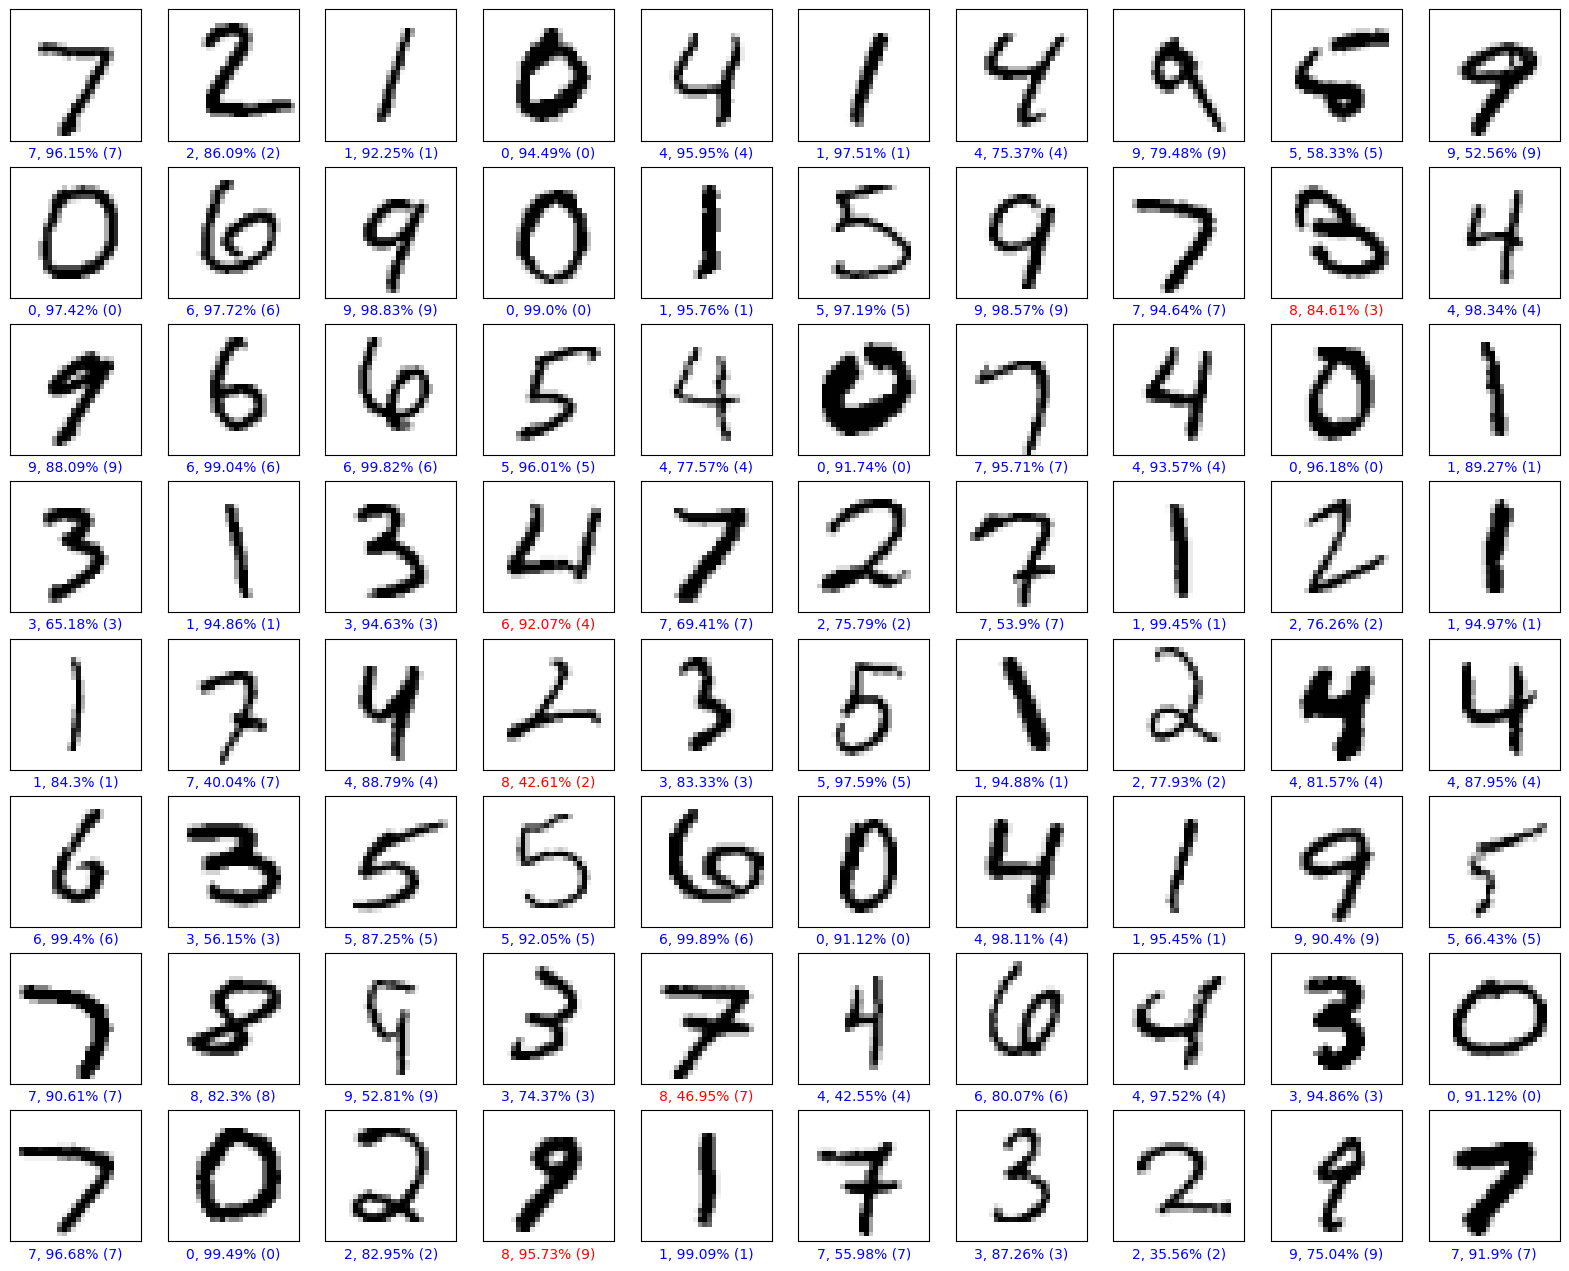

In [23]:
n_rows = 8
n_cols =10

num_numbers = n_rows * n_cols


plt.figure(figsize=(2 * n_cols, 2 * n_rows))

for i in range(num_numbers):
    plt.subplot(n_rows, n_cols, i+1)
    plot_number(i, y_pred, y_test, X_test.reshape(10000, 28, 28))

In [24]:
#for confusion matrix
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test, y_pred_class)

array([[ 933,    1,    2,    0,    1,    4,   15,    1,   23,    0],
       [   0, 1100,    3,    1,    0,    4,    3,    0,   24,    0],
       [   4,    7,  930,    4,    1,    6,    7,   14,   59,    0],
       [   0,    4,   18,  903,    0,   54,    0,   10,   12,    9],
       [   2,    6,    0,    0,  856,    4,   19,    0,   40,   55],
       [   4,    1,    1,    4,    0,  849,    5,    1,   22,    5],
       [   3,    1,    0,    0,    2,    3,  936,    0,   13,    0],
       [   4,    4,   52,    4,    0,    1,    0,  903,   51,    9],
       [   0,    1,    2,    1,    2,    4,    3,    0,  955,    6],
       [   4,    5,    0,    1,    6,   16,    0,    5,   39,  933]])

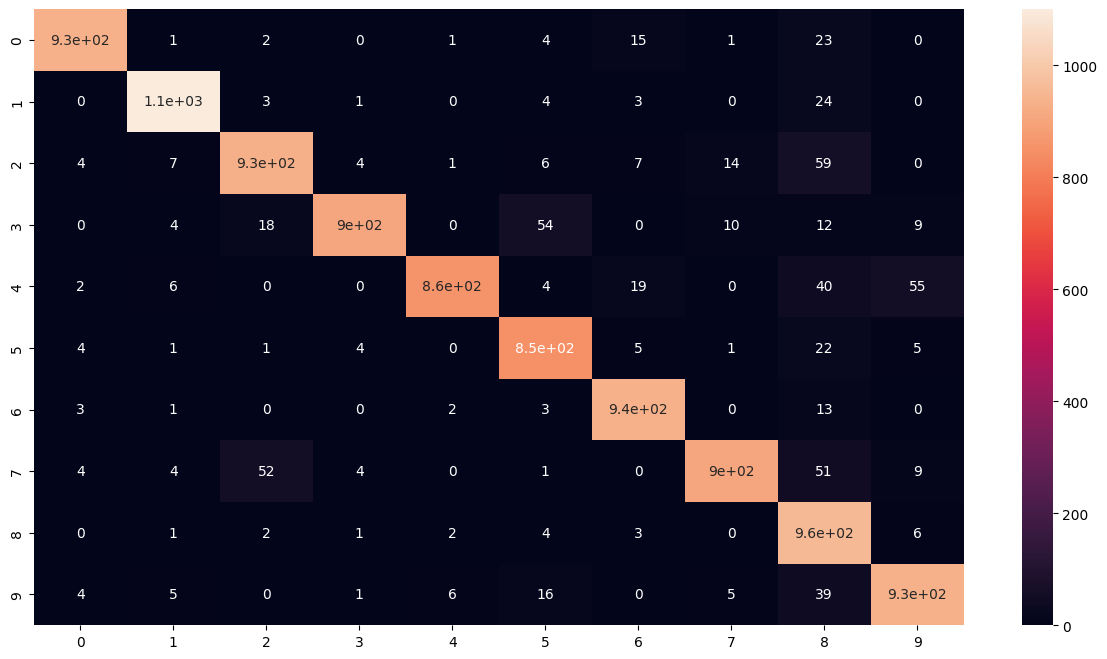

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True)
plt.show()

In [27]:
#saving the model
mnist_model.save('MNIST_MODEL_CNN.hdf5')

In [28]:
#for loading the model
from keras.models import load_model
loaded_model = load_model('./MNIST_MODEL_CNN.hdf5')

In [29]:
loaded_model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


array([[1.5433498e-03, 6.0125269e-05, 1.1205916e-02, ..., 9.6151507e-01,
        1.3680892e-02, 3.5577314e-03],
       [3.3091996e-02, 1.7157163e-02, 8.6087745e-01, ..., 5.4411851e-03,
        2.2644449e-02, 1.0210490e-03],
       [1.7042600e-02, 9.2253548e-01, 2.5853733e-04, ..., 2.3931440e-04,
        3.9825860e-02, 1.3765710e-03],
       ...,
       [1.7224224e-03, 3.1608311e-04, 3.5472491e-04, ..., 2.2382378e-03,
        4.4761725e-02, 3.6270109e-01],
       [1.2421574e-02, 3.3910878e-04, 1.8438783e-03, ..., 7.8241352e-04,
        6.7946233e-02, 3.1032931e-02],
       [2.9868817e-02, 8.5175227e-05, 2.4412645e-03, ..., 1.5562131e-05,
        4.6071690e-02, 2.2433868e-03]], dtype=float32)